# Phase 2 project

This note book is designed to analyse data from the six different movie companies and decide which is best type of content the users consume for a company that is new to the movie making scene.

The analysis will be done in-order to answer the following questions:

* Which are the best performing movies categories to produce?
* Which demographics watch movies ?
* What each demographic prefer to watch ?

Specifically, this will cover:

* Using pandas to filter data
* Using scipy.stats to calcluate probalility and find suitability of data for recommendation

The analysis will divide each data source to a module within a note book. Data cleaning will done comprehensively then afterwords model will be selected to analysis the data so us to answer the business questions above.The modules are:

 #### 1 BOM movie company analysis
 #### 2 IMDB data source analysis
 #### 3 TMDB data source movie analysis
 #### 4 TN movie budgets dataset


In [1]:
#Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1  BOM movie company analysis(Maina Ndirangu)

In [10]:
#Loading the dataset
Data = pd.read_csv('bom_movie_gross.csv')
Data.head (5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


#### Performing EDA on dataset

### Understanding the dataset

In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Our data has a total of 5 columns and 3387 rows.
foreign_gross has 1350 missing values.
domestic_gross has 28 missing values.
studio has 5 missing values.
foreign_gross (object) column needs to be converted to numeric.

In [12]:
# converting the foreign_gross column into numeric
Data['foreign_gross'] = pd.to_numeric(Data['foreign_gross'].astype(str).str.replace('[^\d.]', '', regex=True),errors='coerce')

In [13]:
# missing values
Data.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [14]:
#dropping the null values
Data.dropna(inplace=True)
Data.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [15]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


We now have a total of 2007 rows after dropping the missing values.

In [16]:
#Statistical Summary of our dataset
Data.describe()

,domestic_gross,foreign_gross,year
count,2007.00,2007.00,2007.00
mean,47019840.20,75790384.84,2013.51
std,81626889.32,138179552.63,2.60
min,400.00,600.00,2010.00
25%,670000.00,3900000.00,2011.00
50%,16700000.00,19400000.00,2013.00
75%,56050000.00,75950000.00,2016.00
max,936700000.00,960500000.00,2018.00


The mean average domestic gross is  47.01𝑚𝑖𝑙𝑙𝑖𝑜𝑛𝑎𝑛𝑑
 75.79 million for foreign gross 25% of movies were released before 2011, 75% released before 2016

In [17]:
# Checking for duplicates
Data.duplicated().sum()

0

## Data Visualization

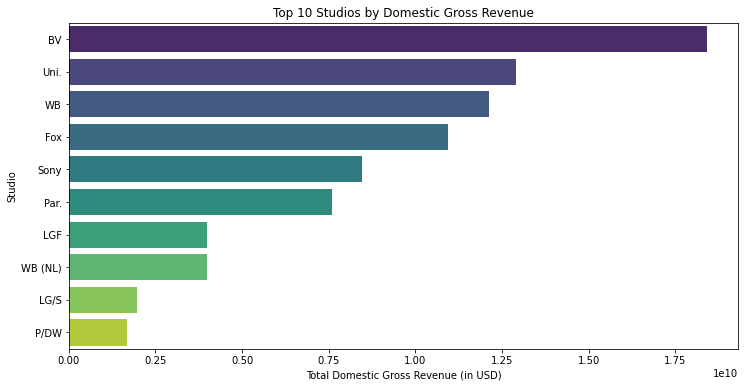

In [18]:
# Top 10 studios by total domestic gross revenue
top_studios = Data.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_studios, x='domestic_gross', y='studio', palette="viridis")
plt.title("Top 10 Studios by Domestic Gross Revenue")
plt.xlabel("Total Domestic Gross Revenue (in USD)")
plt.ylabel("Studio")
plt.show()

BV Studio topped in domestic revenue

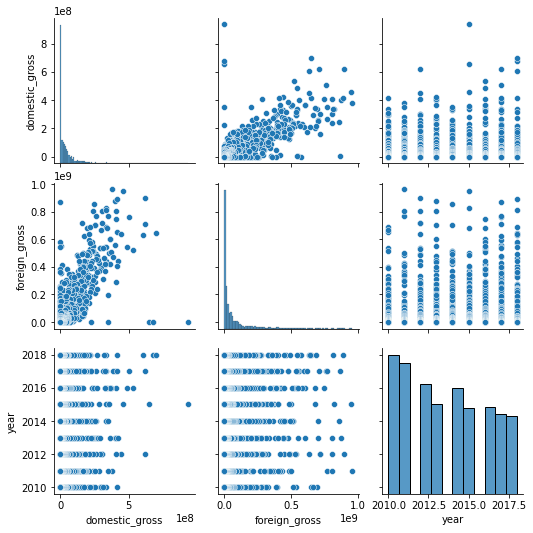

In [25]:
# Plotting a pairplot to check on correlation
sns.pairplot(Data)

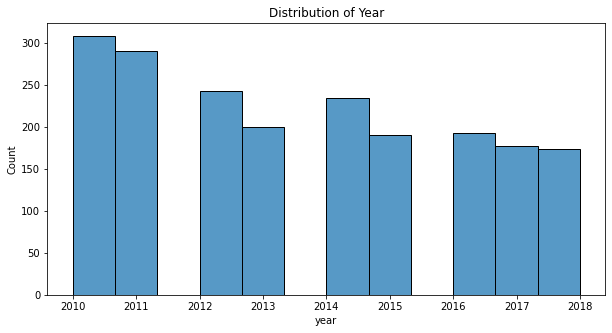

In [20]:
#Univariate analysis
plt.figure(figsize=(10, 5))
sns.histplot(Data['year'])
plt.title('Distribution of Year')
plt.show()

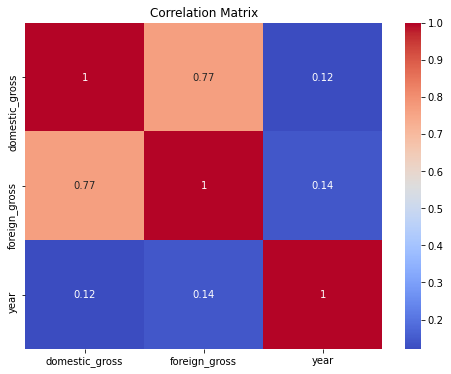

In [24]:
#Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(Data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()      

## 4 TN movie budgets dataset(Humphrey and Charity)

In [2]:
#Import data from the datasource using pandas and showing the first 5 columns
df_movie_budgets=pd.read_csv('tn_movie_budgets.csv')
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
# Getting more info about the data to gain a better understanding 
df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#### Data EDA and cleanup
From the info gotten above, we can see that the dataset has 5782 rows and 6 columns.

In the cell below we will check for null/missing values and duplicate values from the datasource.

In the production_budget, domestic_gross and worldwide_gross columns, I will remove currency sign and commas to make them fully numeric

In [4]:
# Checking for null values
na_values = df_movie_budgets.isnull().sum()
print(na_values)

# The data source has no null values on any of the columns

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


In [5]:
# Checking for duplicate values
duplicates = df_movie_budgets[df_movie_budgets.duplicated()].sum()
print(duplicates)

#from the analysis seen below the data also has no duplicate values

id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64


I will combine both the domestic gross income and worldwide gross income into a new column called total gross income and this will form the basis of our analysis later


In [6]:
# Set pandas display options to prevent scientific notation

pd.set_option('display.float_format', '{:.2f}'.format)

columns_to_clean = ["production_budget", "domestic_gross", "worldwide_gross"]
df_movie_budgets[columns_to_clean] = (
    df_movie_budgets[columns_to_clean]
    .replace({"[$,]": ""}, regex=True)
    .astype(float)
)

# Calculate total gross income correctly
df_movie_budgets["total_gross_income"] = (
    df_movie_budgets["domestic_gross"] + df_movie_budgets["worldwide_gross"]
)
df_movie_budgets.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross_income
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00,3536852904.00
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,1286727750.00
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00,192524700.00
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,1862019831.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,1936903129.00


### Defining null and alternate hypothesis

 #### Null Hypotheis(H0)
 
 The average total gross income does not increase with increase in production budget
 
 #### Alternate Hypotheis(Ha )
 
  The average total gross income increases with increase in production budget
  
 #### Choosing the significance level(α)
  
  The probability threshold for rejecting my null hypothesis is 5%
  
  Significance level=5%


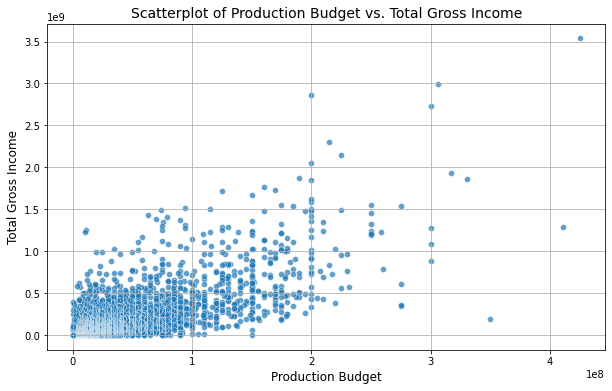

In [7]:

# Scatterplot with Seaborn showing correlation between production budget and Total gross income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='total_gross_income', data=df_movie_budgets, alpha=0.7)
plt.title('Scatterplot of Production Budget vs. Total Gross Income', fontsize=14)
plt.xlabel('Production Budget', fontsize=12)
plt.ylabel('Total Gross Income', fontsize=12)
plt.grid(True)
plt.show()

In [8]:
from scipy.stats import pearsonr

#Calculating the correlation coefficient (𝑟) between production budget and total gross income:

r, p_value = pearsonr(df_movie_budgets['production_budget'], df_movie_budgets['total_gross_income'])
print(f"Correlation coefficient: {r}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.7399121495609371
P-value: 0.0


In [9]:
import statsmodels.api as sm

# Independent variable (budget)
X = df_movie_budgets['production_budget']
X = sm.add_constant(X)  # Add constant term for the intercept

# Dependent variable (total gross income)
y = df_movie_budgets['total_gross_income']

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_gross_income   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     6993.
Date:                Mon, 20 Jan 2025   Prob (F-statistic):               0.00
Time:                        09:31:11   Log-Likelihood:            -1.1748e+05
No. Observations:                5782   AIC:                         2.350e+05
Df Residuals:                    5780   BIC:                         2.350e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.618e+05   2.66e+0

#### Interpretation of results

From the above linear regression regression model, we can conclude that 
* The value of R-squared being equal to 0.547 means that 54.7% of the data describes the linear model making it suitable for analysis

* The p-value is essentially zero(0.00), confirming that the relationship between total gross income and production budget is statistically significant.

* From the production budget coefficient of 4.2460,  For every 1 dollar increase in the production budget, the total gross income increases by approximately 4.25 dollars, on average.

### Recommendation

I would recommend to the head of the company that spending more money on producing a movie leads to higher quality movie which further traslates to more income.
